<a href="https://colab.research.google.com/github/fawziafaraag/Data-exploration-preporation/blob/main/DEP_TASK_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#   Reading the Dataset

In [3]:
import pandas as pd
df=pd.read_excel("IPEDS_data.xlsx")
df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


#  Data Preparation: Cleaning and Formatting



In [13]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 1534 rows and 145 columns


In [10]:
df.info(max_cols=len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

In [12]:
df.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [16]:
perc_nan=df.isna().sum()/len(df)*100
print(perc_nan.sort_values(ascending=False))

Endowment assets (year end) per FTE enrollment (GASB)      66.362451
SAT Writing 25th percentile score                          53.455020
SAT Writing 75th percentile score                          53.455020
Number of first-time undergraduates - foreign countries    40.612777
Percent of first-time undergraduates - out-of-state        40.612777
                                                             ...    
Level of institution                                        0.000000
Control of institution                                      0.000000
Historically Black College or University                    0.000000
Tribal college                                              0.000000
State abbreviation                                          0.000000
Length: 145, dtype: float64


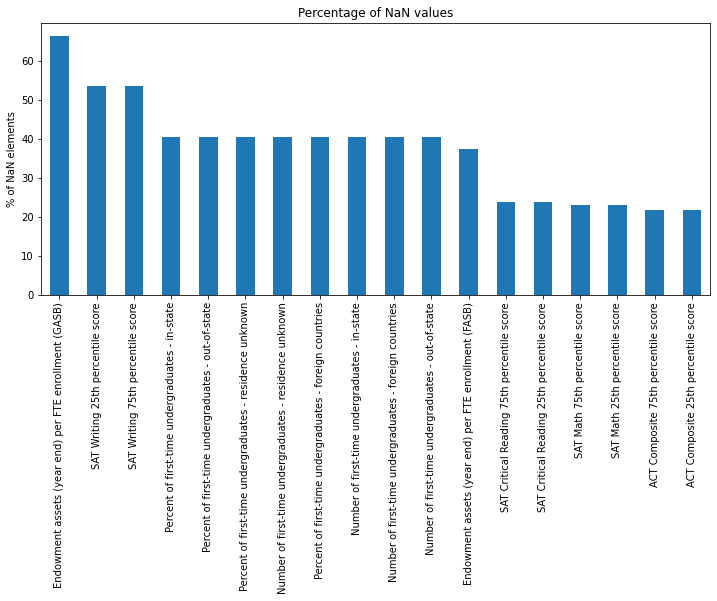

In [17]:
ax=perc_nan[perc_nan>=20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(12,5));
ax.set_ylabel('% of NaN elements');

In [18]:
column_off=df.isna().sum()[df.isna().sum()>=(0.2*len(df))]
print(column_off.sort_values(ascending=False))
column_off=column_off.index.to_list()  #to convert to a list
#perc_nan[perc_nan>=20].sort_values(ascending=False).index

Endowment assets (year end) per FTE enrollment (GASB)       1018
SAT Writing 25th percentile score                            820
SAT Writing 75th percentile score                            820
Percent of first-time undergraduates - in-state              623
Percent of first-time undergraduates - out-of-state          623
Percent of first-time undergraduates - residence unknown     623
Number of first-time undergraduates - residence unknown      623
Percent of first-time undergraduates - foreign countries     623
Number of first-time undergraduates - in-state               623
Number of first-time undergraduates - foreign countries      623
Number of first-time undergraduates - out-of-state           623
Endowment assets (year end) per FTE enrollment (FASB)        574
SAT Critical Reading 75th percentile score                   365
SAT Critical Reading 25th percentile score                   365
SAT Math 75th percentile score                               352
SAT Math 25th percentile 

In [20]:
df.drop(column_off,axis=1,inplace=True)
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]
df=df[interesting_columns]
df.head()

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,0.0,0.0,67.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0


In [21]:
df.dropna(axis=0,inplace=True)
df.isna().sum().sort_values(ascending=False)

Name                                                              0
Control of institution                                            0
Graduation rate - Bachelor degree within 5 years, total           0
Graduation rate - Bachelor degree within 4 years, total           0
Percent of graduate enrollment that are women                     0
Percent of undergraduate enrollment that are women                0
Percent of total enrollment that are women                        0
Part-time undergraduate enrollment                                0
Full-time undergraduate enrollment                                0
Graduate enrollment                                               0
Undergraduate enrollment                                          0
Part-time enrollment                                              0
Full-time enrollment                                              0
Total  enrollment                                                 0
State abbreviation                              

In [22]:
col=df.select_dtypes(include=['float64','int64']).columns #to select only integer data types
df[df[col]<0].sum()

Name                                                                0
year                                                              0.0
Highest degree offered                                              0
Offers Bachelor's degree                                            0
Offers Master's degree                                              0
Offers Doctor's degree - research/scholarship                       0
Offers Doctor's degree - professional practice                      0
Applicants total                                                  0.0
Admissions total                                                  0.0
Enrolled total                                                    0.0
Estimated enrollment, total                                       0.0
Tuition and fees, 2013-14                                         0.0
Total price for in-state students living on campus 2013-14        0.0
Total price for out-of-state students living on campus 2013-14    0.0
State abbreviation  

In [24]:
df.describe() #summary(data)

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1116.0,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,2013.0,7280.008065,4050.931900,1192.931900,8554.193548,21170.265233,34929.564516,39237.403226,8590.670251,6675.015233,...,6607.969534,1982.700717,5549.250000,1058.719534,57.989247,57.154122,62.698925,38.357527,51.917563,55.466846
std,0.0,9479.188312,4602.472198,1370.377736,10114.608152,12282.931254,13009.471894,10048.079505,10130.070511,8178.038654,...,7717.460494,3043.137626,6597.741126,1680.821384,11.204414,11.429781,14.065600,20.179338,17.793091,16.468907
min,2013.0,4.000000,4.000000,2.000000,219.000000,4358.000000,13063.000000,16191.000000,229.000000,142.000000,...,112.000000,1.000000,108.000000,0.000000,3.000000,0.000000,0.000000,0.000000,6.000000,11.000000
25%,2013.0,1705.500000,1110.750000,338.750000,2167.000000,8721.500000,22667.250000,31989.500000,2185.500000,1650.750000,...,1706.500000,250.750000,1421.000000,147.000000,52.750000,52.000000,55.000000,22.000000,38.000000,43.000000
50%,2013.0,3720.000000,2345.000000,639.500000,4394.500000,22251.000000,34481.000000,37643.000000,4401.500000,3298.500000,...,3255.500000,817.500000,2718.000000,422.000000,58.000000,57.000000,63.000000,36.000000,51.000000,54.000000
75%,2013.0,8597.000000,4931.000000,1449.500000,10917.750000,30300.000000,44364.000000,45536.000000,10987.250000,8412.000000,...,8303.750000,2389.500000,6966.750000,1233.500000,63.000000,61.000000,72.000000,52.000000,64.000000,67.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,21553.000000,99.000000,100.000000,100.000000,90.000000,96.000000,98.000000


In [25]:
df.columns  #colnames(data)

Index(['Name', 'year', 'Highest degree offered', 'Offers Bachelor's degree',
       'Offers Master's degree',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice', 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 yea

In [26]:
def remove_space(list_headers,charact): #charact should be: charact=[' - ',' ']
    new_headers=list()
    for header in list_headers:
        for char in charact:      
            if char in header:
                header=header.replace(char,'_')
            header=header
        new_headers.append(header)
    return new_headers

In [27]:
def remove_sp_char(headers,chars):
    new_headers=list()
    for header in headers:    
        for char in chars:
            if char=='-' or char=='/':
                header=header.replace(char,'_')
            if char in header:
                header=header.replace(char,'')
            
            header=header   
        new_headers.append(header)
    return new_headers

In [28]:
headers=remove_space(df.columns,[' - ',' '])

In [29]:
headers=remove_sp_char(headers,["'",',',':','-','/'])

In [30]:
list_new_header=list()

for header in headers:
    header=header.casefold()   # All capitalized letters are changed.
    
    if "degrese" in header:    # One column name has a typo.  
        header=header.replace("degrese",'degrees')
            
    list_new_header.append(header)

In [32]:
df.columns=list_new_header

In [33]:
df.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state_abbreviation', 'control_of_institution', 'total__enrollment',
       'full_time_enrollment', 'part_time_enrollment',
       'undergraduate_enrollment', 'graduate_enrollment',
       'full_time_undergraduate_enrollment',
       'part_time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate_bachelor_degree_within_4_years_total',
       '

In [34]:
df.rename(columns={'state_abbreviation':'state'}, inplace=True)

# Exploratory Data Analysis (EDA) and Visualization



In [35]:
df.describe()

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,total__enrollment,full_time_enrollment,...,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1116.0,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,2013.0,7280.008065,4050.931900,1192.931900,8554.193548,21170.265233,34929.564516,39237.403226,8590.670251,6675.015233,...,6607.969534,1982.700717,5549.250000,1058.719534,57.989247,57.154122,62.698925,38.357527,51.917563,55.466846
std,0.0,9479.188312,4602.472198,1370.377736,10114.608152,12282.931254,13009.471894,10048.079505,10130.070511,8178.038654,...,7717.460494,3043.137626,6597.741126,1680.821384,11.204414,11.429781,14.065600,20.179338,17.793091,16.468907
min,2013.0,4.000000,4.000000,2.000000,219.000000,4358.000000,13063.000000,16191.000000,229.000000,142.000000,...,112.000000,1.000000,108.000000,0.000000,3.000000,0.000000,0.000000,0.000000,6.000000,11.000000
25%,2013.0,1705.500000,1110.750000,338.750000,2167.000000,8721.500000,22667.250000,31989.500000,2185.500000,1650.750000,...,1706.500000,250.750000,1421.000000,147.000000,52.750000,52.000000,55.000000,22.000000,38.000000,43.000000
50%,2013.0,3720.000000,2345.000000,639.500000,4394.500000,22251.000000,34481.000000,37643.000000,4401.500000,3298.500000,...,3255.500000,817.500000,2718.000000,422.000000,58.000000,57.000000,63.000000,36.000000,51.000000,54.000000
75%,2013.0,8597.000000,4931.000000,1449.500000,10917.750000,30300.000000,44364.000000,45536.000000,10987.250000,8412.000000,...,8303.750000,2389.500000,6966.750000,1233.500000,63.000000,61.000000,72.000000,52.000000,64.000000,67.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,21553.000000,99.000000,100.000000,100.000000,90.000000,96.000000,98.000000


In [36]:
df.groupby(by='control_of_institution').count()

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
control_of_institution,,,,,,,,,,,,,,,,,,,,,
Private not-for-profit,675,675,675,675,675,675,675,675,675,675,...,675,675,675,675,675,675,675,675,675,675
Public,441,441,441,441,441,441,441,441,441,441,...,441,441,441,441,441,441,441,441,441,441


Its interesting to see how 1 university got only 4 applications and 1 got around 73000 applications.

In [37]:
high_app_df=df[['name','applicants_total']].sort_values('applicants_total',ascending=False).head(20)

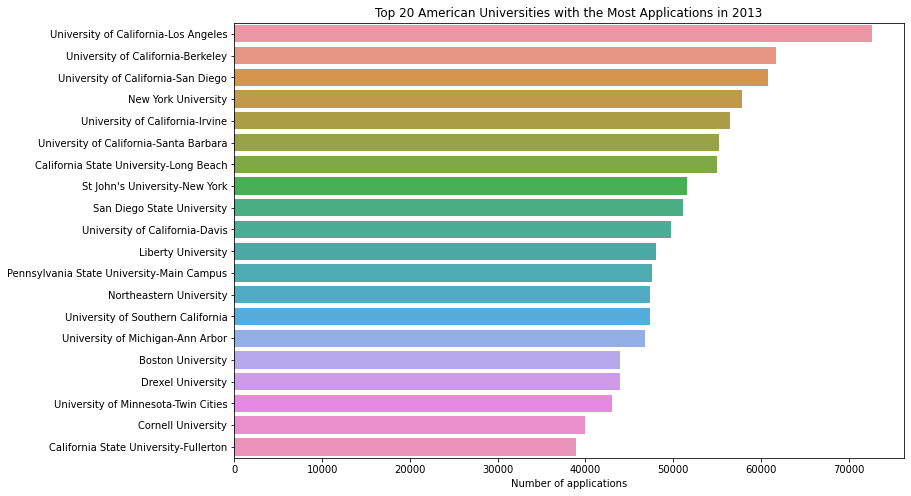

In [38]:
plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=10
sns.barplot(x='applicants_total',y='name',data=high_app_df)
plt.title('Top 20 American Universities with the Most Applications in 2013')
plt.xlabel('Number of applications')
plt.ylabel('');

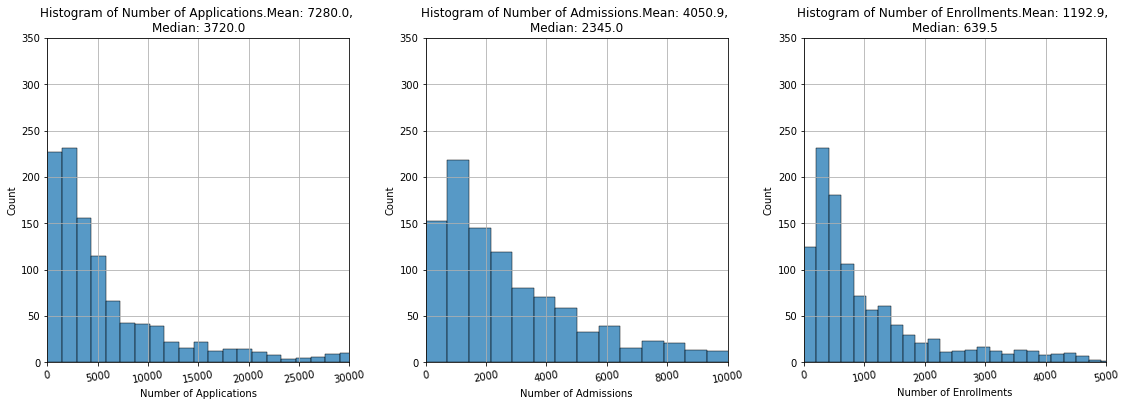

In [40]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(df.applicants_total,bins=50)
plt.title('''Histogram of Number of Applications.Mean: {:.1f}, 
Median: {:.1f}'''.format(df.applicants_total.mean(),df.applicants_total.median()));
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,2)
sns.histplot(df.admissions_total,bins=50)
plt.title('''Histogram of Number of Admissions.Mean: {:.1f}, 
Median: {:.1f}'''.format(df.admissions_total.mean(),df.admissions_total.median()));
plt.axis([0,10000,0,350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(df.enrolled_total,bins=50)
plt.title('''Histogram of Number of Enrollments.Mean: {:.1f}, 
Median: {:.1f}'''.format(df.enrolled_total.mean(),df.enrolled_total.median()));
plt.axis([0,5000,0,350])
plt.xlabel('Number of Enrollments')
plt.grid()
plt.xticks(rotation=10)
plt.tight_layout(pad=2);

1.Do universities with a high number of applications are the preferred ones by students?; in other words, could the number of applications tell us that a university is one of the most preferred by students?.


2.Do students prefer universities that have a high rate of admission?, in other words, do students prefer a university where it is easier for them to be admitted?.

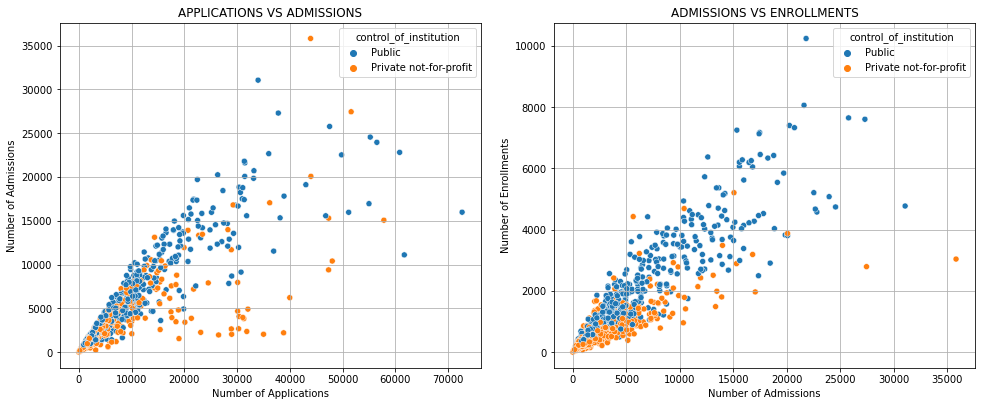

In [41]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('APPLICATIONS VS ADMISSIONS')
sns.scatterplot(y=df.admissions_total,x=df.applicants_total,hue=df.control_of_institution)
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
plt.grid()

plt.subplot(1,2,2)
plt.title('ADMISSIONS VS ENROLLMENTS')
sns.scatterplot(x=df.admissions_total,y=df.enrolled_total,hue=df.control_of_institution)
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2)

-If we look at the left figure, we can see that, with a few exceptions, universities with a high number of applications also have a high number of admissions, and vice versa. However, the universities with the highest number of applications are not the ones with the highest number of admissions. Additionally, there is a batch of private universities with a high amount of applications, but their number of admissions is pretty low.

-If we look at the figure on the right, we can see that the higher the number of admissions, the higher the number of enrollments, too. However, it could be more meaningful to work with a rate of admissions or acceptance and an enrollment rate.

Additionally, we should address the number of applications and admissions to the number of enrollments because if a student applies to several universities, is admitted to several universities, in the end, he will enroll only in the preferred one.

In [43]:
df['acceptance_rate']=(df.admissions_total/df.applicants_total*100).round(2)
df['enrollment_rate']=(df.enrolled_total/df.admissions_total*100).round(2)

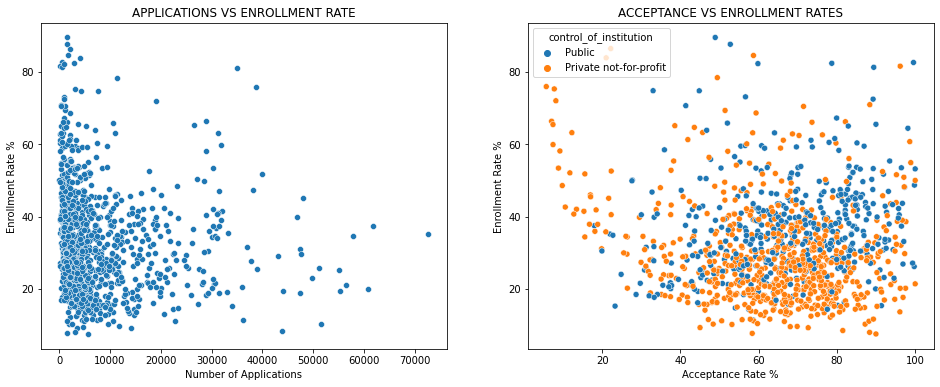

In [44]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='applicants_total',y='enrollment_rate',data=df)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications');

plt.subplot(1,2,2)
sns.scatterplot(x='acceptance_rate',y='enrollment_rate',data=df,hue=df.control_of_institution)
plt.title('ACCEPTANCE VS ENROLLMENT RATES')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Acceptance Rate %');

-The left figure tells us that the universities which receive a lower number of applications are the ones with a higher enrollment rate. Obviously, there are some exceptions, but this is the strongest tendency. Consequently, we can say that a high number of applications does not mean that a university is preferred among students.

-From the right figure we can see that for high acceptance rates, the enrollment rate vastly varies among public and private universities; nonetheless, there is a higher concentration where the enrollment rate is not high. That leads us to think that the acceptance rate is not a feature that strongly influences the student's preference for a university. On the other hand, we can see that the lower the acceptance rate is, the higher the enrollment rate will be. Therefore, students do not necessarily prefer a university because of its high acceptance rate or because it is easier for students to be admitted to a university. Additionally, it's interesting to spot that the universities with the lowest acceptance rate are private universities, and several of them have a high enrollment rate. Thereby, though it is difficult for students to be admitted to these private institutions when they are accepted, they enroll straightforwardly. 

In [45]:
high_acceptance=df[df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).head(25)
low_acceptance=df[df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=True).head(25)

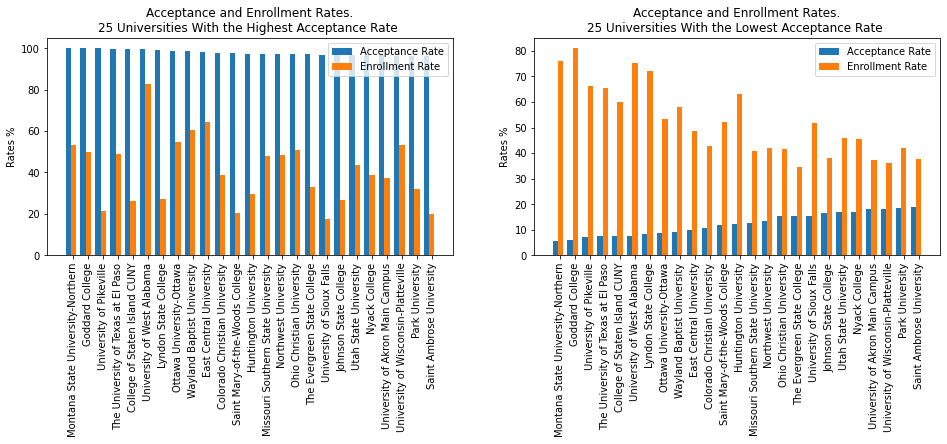

In [46]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ind = np.arange(len(high_acceptance)) #number of universities
width = 0.35       #space

plt.bar(ind, high_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, high_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Highest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.name.values,rotation=90 )
plt.legend(loc='best');

plt.subplot(1,2,2)
ind = np.arange(len(low_acceptance)) #number of universities
width = 0.35       #space

plt.bar(ind, low_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, low_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Lowest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.name.values,rotation=90 )
plt.legend(loc='best');

3.Do students prefer public or private universities?

In [47]:
uni_private_df=df[df.control_of_institution=='Private not-for-profit']
#uni_private_df=uni_private_df[uni_private_df.applicants_total.notnull()]

uni_public_df=df[df.control_of_institution=='Public']
#uni_public_df=uni_public_df[uni_public_df.applicants_total.notnull()]

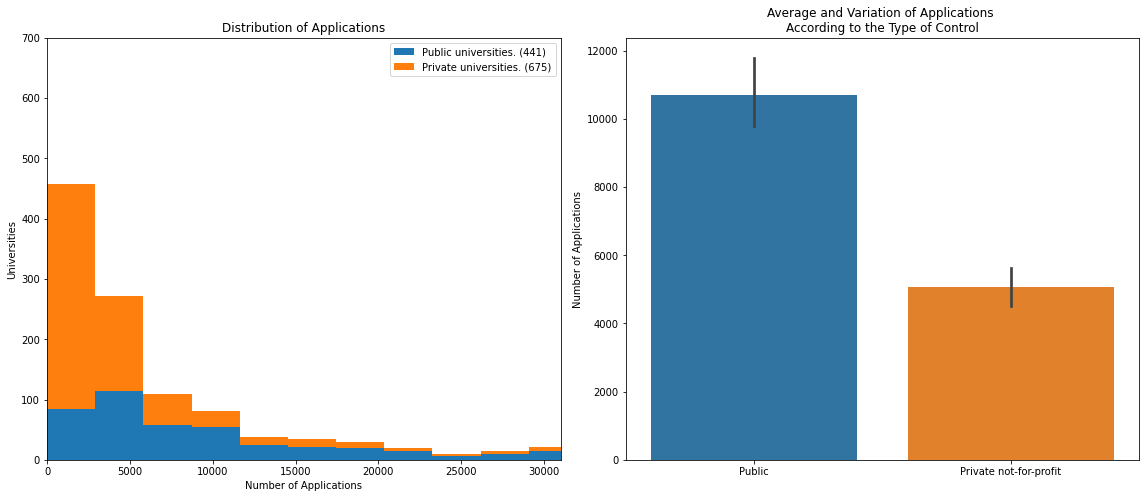

In [48]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.hist([uni_public_df.applicants_total,uni_private_df.applicants_total],stacked=True,bins=25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(uni_public_df)),'Private universities. ({})'.format(len(uni_private_df))]);

plt.subplot(1,2,2)
sns.barplot(x=df.control_of_institution,y=df.applicants_total);
plt.title('''Average and Variation of Applications 
According to the Type of Control''')
plt.xlabel('')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=1)

In [49]:
print('The minimum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(uni_private_df.applicants_total.min()),int(uni_public_df.applicants_total.min())))

The minimum number of applications for private universities was 4; whereas, for public universities was 345.


In [50]:
print('The maximum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(uni_private_df.applicants_total.max()), int(uni_public_df.applicants_total.max())))

The maximum number of applications for private universities was 57845; whereas, for public universities was 72676.


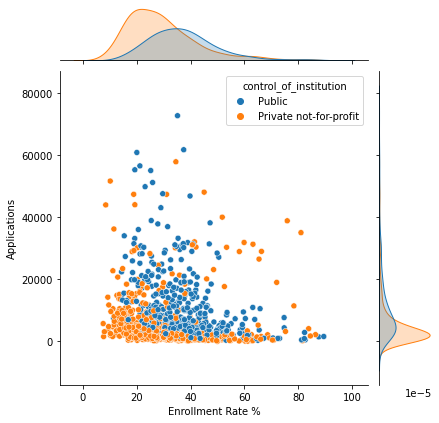

In [51]:
g=sns.jointplot(x=df.enrollment_rate,y=df.applicants_total,hue=df.control_of_institution,height=6);
g=(g.set_axis_labels("Enrollment Rate %","Applications"))

-By analyzing the figure above, we can see that the enrollment rate, on average, is higher for public universities than the average for private universities. So, if we add this finding to the ones above, we can conclude that, in fact, there is a students' preference for public universities.

4.Do students prefer universities with low tuition and fees?

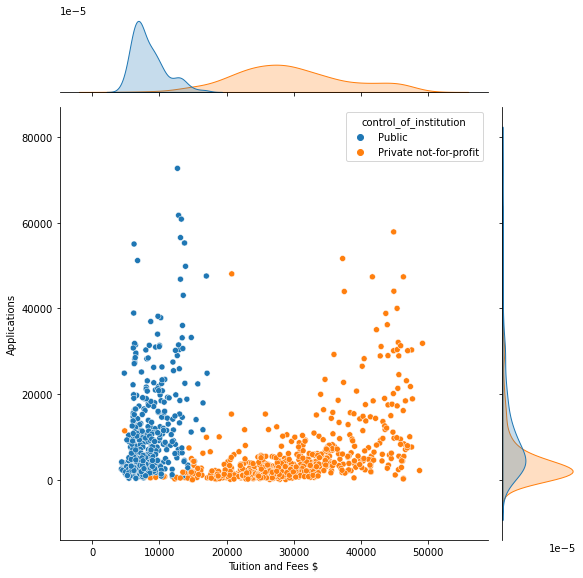

In [52]:
g=sns.jointplot(x=df.tuition_and_fees_2013_14,y=df.applicants_total,hue=df.control_of_institution,height=8);
g=(g.set_axis_labels("Tuition and Fees $","Applications"))

-Looking at the figure above, we find that the most affordable universities receive the highest number of applications. This could make us think that there could be a relationship between the tuition and fees and the students' preference; however, we could endeavor to find a definite conclusion by analyzing tuition and fees and enrollment rates.

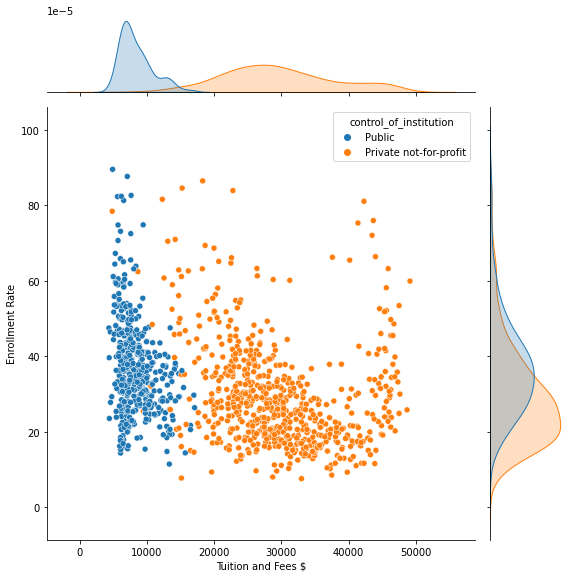

In [54]:
g=sns.jointplot(x=df.tuition_and_fees_2013_14,y=df.enrollment_rate,hue=df.control_of_institution,height=8);
g=(g.set_axis_labels("Tuition and Fees $","Enrollment Rate"))

-This figure shows us that public universities are more affordable than the majority of private universities. We can see that affordable universities have higher enrollment rates than those of the most expensive universities. This leads us to think that, when it comes to tuition and fees, students prefer affordable universities. Additionally, if we remember the conclusion of the last finding of public universities then, now, we could say that we found the reason or one of the reasons for the students' preference for public universities. Public universities are much more affordable than the majority of private universities.

5.Q: Do students prefer a university for its low cost of on-campus living?

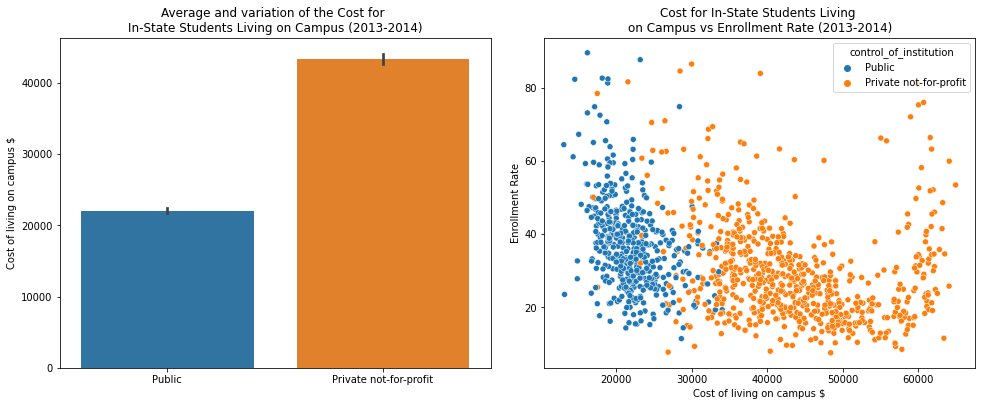

In [56]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(y=df.total_price_for_in_state_students_living_on_campus_2013_14,x=df.control_of_institution)
plt.title('''Average and variation of the Cost for 
In-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')


plt.subplot(1,2,2)
sns.scatterplot(x=df.total_price_for_in_state_students_living_on_campus_2013_14,y=df.enrollment_rate,hue=df.control_of_institution);
plt.title('''Cost for In-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')


plt.tight_layout(pad=2)

-The first and most conspicuous insight that these figures show is that the majority of public universities offer a much more affordable cost for in-state students than private universities. In fact, the average cost in the case of public universities is half of that in the case of private universities.

-Second, the right figure shows that high enrollment rates are more frequent when the cost is more affordable. This leads us to think that students, indeed, look for universities that offer an affordable cost of living on campus for in-state students.

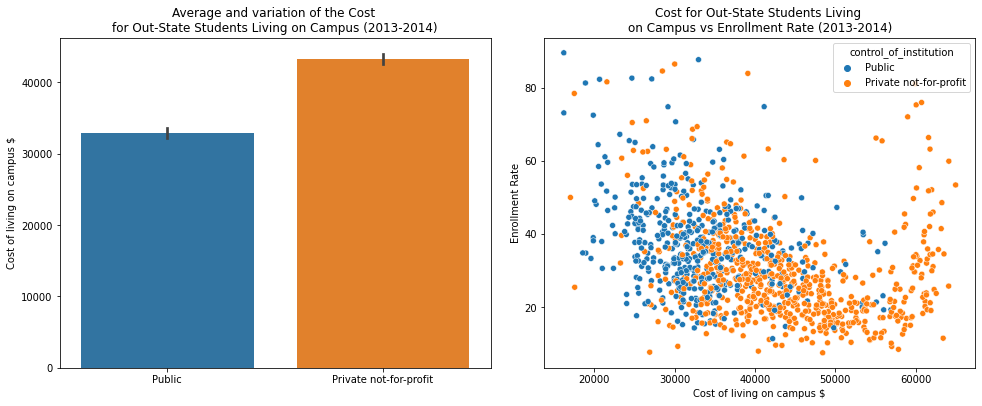

In [57]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,2)
sns.scatterplot(x=df.total_price_for_out_of_state_students_living_on_campus_2013_14,y=df.enrollment_rate,hue=df.control_of_institution);
plt.title('''Cost for Out-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')

plt.subplot(1,2,1)
sns.barplot(y=df.total_price_for_out_of_state_students_living_on_campus_2013_14,x=df.control_of_institution)
plt.title('''Average and variation of the Cost 
for Out-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.tight_layout(pad=2)

-In the case of out-state students, the average cost in the case of public universities is, again, lower than that of private universities.

-Additionally, for out-state students, we find a similar pattern as in the case of in-state students: high enrollment rates are more frequent among affordable costs. Therefore, students prefer universities that offer an affordable cost of living on campus for out-state students.

6.Q: Do students prefer universities from highly populated states?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'District of Columbia'),
  Text(9, 0, 'Florida'),
  Text(10, 0, 'Georgia'),
  Text(11, 0, 'Hawaii'),
  Text(12, 0, 'Idaho'),
  Text(13, 0, 'Illinois'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'Iowa'),
  Text(16, 0, 'Kansas'),
  Text(17, 0, 'Kentucky'),
  Text(18, 0, 'Louisiana'),
  Text(19, 0, 'Maine'),
  Text(20, 0, 'Maryland'),
  Text(21, 0, 'Massachusetts'),
  Text(22, 0, 'Michigan'),
  Text(23, 0, 'Minnesota'),
  Text(24, 0, 'Mississippi'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Montana'),
  Text(27, 0, 'Nebraska'),
  Text(28, 0, 'Neva

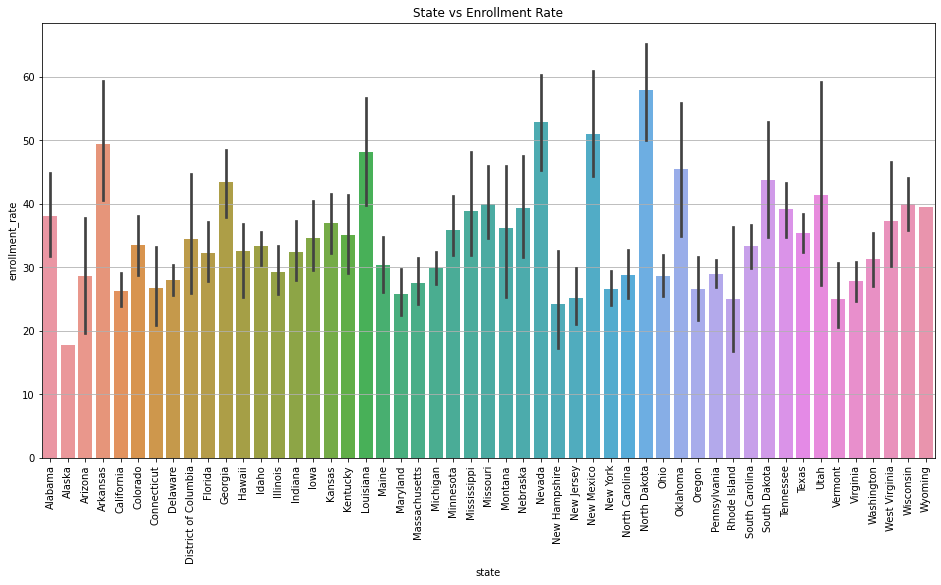

In [58]:
plt.figure(figsize=(16,8))
sns.barplot(x=df.state,y=df.enrollment_rate);
plt.title('State vs Enrollment Rate')
plt.grid(axis='y')
plt.xticks(rotation=90)

-When it comes to population and enrollment rate, in general, there is not a strong tendency; however, we see that a few universities from low-population states have the highest enrollment rates. Therefore, we can not conclude that students prefer universities because they belong to crowded American states.

7.Do students prefer a university because it belongs to a state with a high GDP per capita?


8.Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?

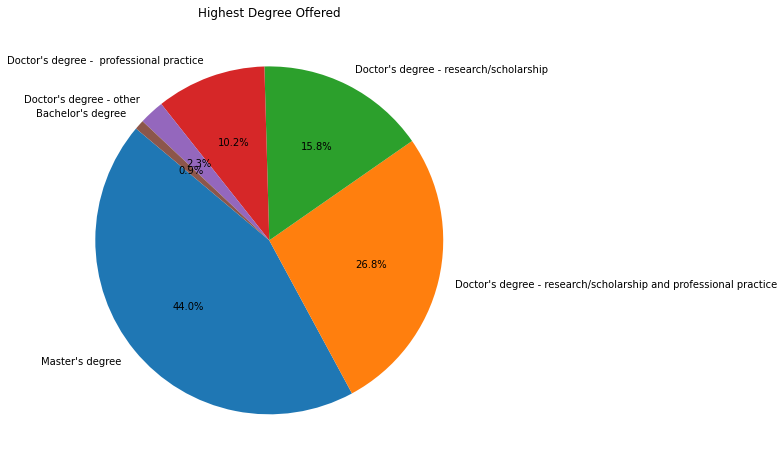

In [59]:
hg_degree=df.highest_degree_offered.value_counts()
plt.figure(figsize=(16,8))
plt.pie(hg_degree,labels=hg_degree.index,
       autopct='%.1f%%',startangle=140)
plt.title('Highest Degree Offered');

-The majority of universities offer up to a Master's degree. It's interesting to note that there is a high percentage of universities that offer only up to a Bachelor's degree.

<ipython-input-61-c29f08d0dfc7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('''Doctor's Degree:


[Text(0, 0, "Doctor's Degree: \nResearch/Scholarship"),
 Text(1, 0, "Doctor's Degree: Research/\nScholarship & Professional \nPractice"),
 Text(2, 0, "Bacherlor's Degree"),
 Text(3, 0, "Doctor's Degree: \nProfessional Practice"),
 Text(4, 0, "Master's Degree"),
 Text(5, 0, "Doctor's Degree: Other")]

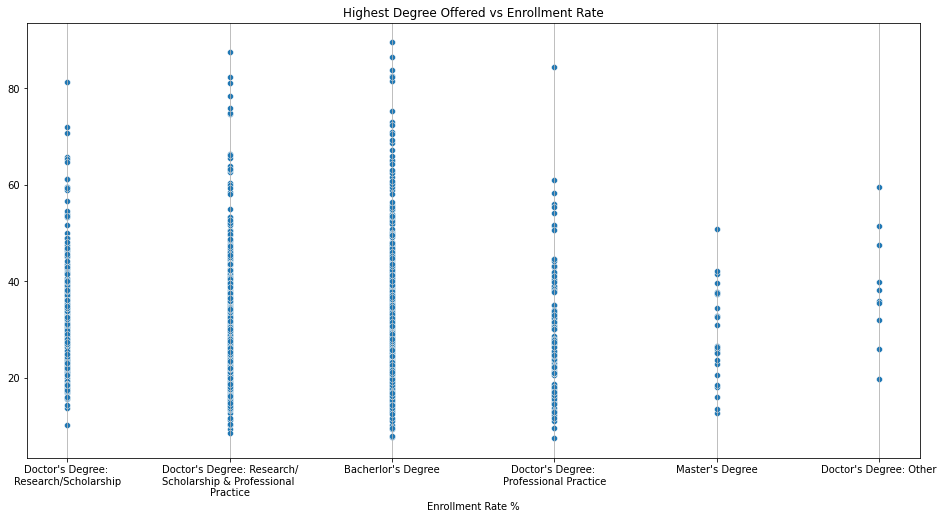

In [61]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(x='highest_degree_offered',y='enrollment_rate',data=df);
plt.title('Highest Degree Offered vs Enrollment Rate')
plt.ylabel('')
plt.xlabel('Enrollment Rate %')
plt.grid(axis='x')
ax.set_xticklabels(('''Doctor's Degree: 
Research/Scholarship''',
                    '''Doctor's Degree: Research/
Scholarship & Professional 
Practice''',
                    "Bacherlor's Degree",
                    '''Doctor's Degree: 
Professional Practice''',
                    "Master's Degree",
                    "Doctor's Degree: Other"))

-There are several Doctor's degrees offered, and even though we join them, still, the trend is that, more frequently, universities that offer up to a Bachelor's degree or a Master's degree have high enrollment rates. Therefore, we could think that students do not necessarily look for a university thinking about the possibility of continuing a next degree in the same university.

#      Conclusions


1-High number of application is not directly proportional to high preference amongst students. on the contrary the universities which receive a less number of applications are the ones which have a high enrollement rate. This goes to show that students dont necessarily prefer universities that solely have a high number of applications but also keep in mind other aspects of the universities.

2-There is not a high relationship between admission and enrollement rate hence we can say that students do not necessarily prefer a university because of its high acceptance rate. Also, it's interesting to spot that the universities with the lowest acceptance rate are private universities, and several of them have a high enrollment rate.

3-The enrollment rate is higher for public universities when compared to private universities. This can be attributed to many factors including but not limited to lower fees, higher recognition, more alumni base, more courses offered etc. So, there is a strong students' preference for public universities.

4-When it comes to tuition and fees, students prefer affordable universities. Also, students preference for public universities comes from the fact that they are way more affordable than private universities which very strongly asserts the face that tuition and fees is one of the major factors which affect students decision on which university to choose.

5-The relationship between on-campus living and high enrollment rate can also be seen as it makes sense because it is the cost that is associated in this context. More affordability means more preference for students. This means that students, whether in-state and out-state students, prefer universities with affordable costs of on-campus living. Also, it can be seen that majority of public universities offer a much more affordable price for in-state students than private universities because public universities are more oftenly funded by the state they are in partially or fully.

6-Since there was no trend/ relationship between the state population and the enrollment rates, we cannot say that students prefer universities of crowded states. As we say that students would again prioritize cost over state population we can assert that state population isnt a contributing factor as per our data.

8-Now when students look for a university to study for a Bachelor's degree, they mostly dont consider the fact that they want to pursue a higher degree from the same university. in fact if we see the trend more oftenly or not there are very few instances where student continue to pursue higher education from the same university. This shows that possibility of choosing higher education in the same university is not a factor which students consider while choosing their univeristies.

***Although the results are quite good we need more data for improving the accuracy, it's necessary to have the information of other years, expand the number of universities, and add more dense information about other unviersities.